In [1]:
import sys, os
sys.path.append("../..")
import gempy as gp
import numpy as np

C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implemen

In [3]:
resolution = [50,50,50]
extent = np.array([777000, 794500, 6345000, 6353000, -3000, 1000])

In [4]:
geo_model = gp.create_model('Alesmodel')

In [5]:
gp.init_data(geo_model, extent = extent, resolution = resolution,
                        path_i = os.pardir+"/data/input_data/AlesModel/finalfinalfinal2_Points.csv",
                        path_o = os.pardir+"/data/input_data/AlesModel/finalfinalfinal2_Foliations.csv")

Alesmodel  2019-05-24 11:31

In [7]:
print(len(geo_model.orientations.df))
print(len(geo_model.surface_points.df))
print(len(geo_model.surfaces.df))

1556
334
9


In [6]:
#sorting of lithologies
gp.map_series_to_surfaces(geo_model,{'fault_NWSE':('fault_NWSE'),
                        'fault_NS':('fault_NS'),
                        'fault_NESW1':('fault_NESW1'),
                        'fault_NESW2':('fault_NESW2'),
                        'fault_NESW3':('fault_NESW3'),
                        'Trias_Series':('Liassic','Triassic'), 
                        'Carbon_Series':('Carboniferous'), 
                        'Basement_Series':('basement')},remove_unused_series=True)

,surface,series,order_surfaces,isBasement,color,id
3,fault_NWSE,fault_NWSE,1,False,#728f02,1
7,fault_NS,fault_NS,1,False,#5DA629,2
4,fault_NESW1,fault_NESW1,1,False,#443988,3
6,fault_NESW2,fault_NESW2,1,False,#325916,4
5,fault_NESW3,fault_NESW3,1,False,#ff3f20,5
0,Triassic,Trias_Series,1,False,#015482,6
2,Liassic,Trias_Series,2,False,#ffbe00,7
1,Carboniferous,Carbon_Series,1,False,#9f0052,8
8,basement,Basement_Series,1,True,#acc2d9,9


In [7]:
geo_model.series

,order_series,BottomRelation
fault_NWSE,1,Erosion
fault_NS,2,Erosion
fault_NESW1,3,Erosion
fault_NESW2,4,Erosion
fault_NESW3,5,Erosion
Trias_Series,6,Erosion
Carbon_Series,7,Erosion
Basement_Series,8,Erosion


In [8]:
colordict = {'Liassic':'#015482', 'Triassic': '#9f0052', 'Carboniferous':'#ffbe00','basement':'#728f02',
            'fault_NWSE':'#2a2a2a','fault_NS':'#2a2a2a','fault_NESW2':'#939393','fault_NESW1':'#939393',
             'fault_NESW3':'#939393' }
geo_model.surfaces.colors.change_colors(colordict)

,surface,series,order_surfaces,isBasement,color,id
3,fault_NWSE,fault_NWSE,1,False,#2a2a2a,1
7,fault_NS,fault_NS,1,False,#2a2a2a,2
4,fault_NESW1,fault_NESW1,1,False,#939393,3
6,fault_NESW2,fault_NESW2,1,False,#939393,4
5,fault_NESW3,fault_NESW3,1,False,#939393,5
0,Triassic,Trias_Series,1,False,#9f0052,6
2,Liassic,Trias_Series,2,False,#015482,7
1,Carboniferous,Carbon_Series,1,False,#ffbe00,8
8,basement,Basement_Series,1,True,#728f02,9


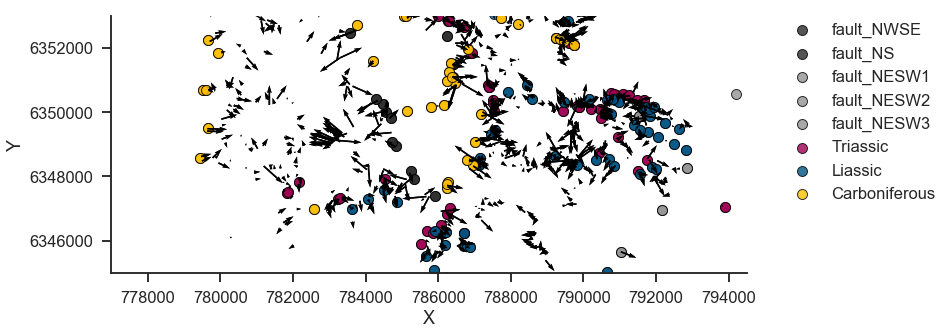

In [9]:
gp.plot.plot_data(geo_model,direction='z')
#plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\clusteredorient_only.png", format='png', dpi=1000)

#### Faults and fault relations

In [10]:
geo_model.set_is_fault(['fault_NWSE', 'fault_NS', 'fault_NESW1','fault_NESW2', 
                       'fault_NESW3'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
fault_NWSE,True,False
fault_NS,True,False
fault_NESW1,True,False
fault_NESW2,True,False
fault_NESW3,True,False
Trias_Series,False,False
Carbon_Series,False,False
Basement_Series,False,False


In [ ]:
fault_relations = np.load('fault_relations.npy')

In [22]:
geo_model.faults.set_fault_relation(fault_relations)

,fault_NWSE,fault_NS,fault_NESW1,fault_NESW2,fault_NESW3,Trias_Series,Carbon_Series,Basement_Series
fault_NWSE,False,True,True,True,True,True,True,True
fault_NS,False,False,True,True,True,True,True,True
fault_NESW1,False,False,False,True,True,True,False,False
fault_NESW2,False,False,False,False,True,True,False,False
fault_NESW3,False,False,False,False,False,True,False,False
Trias_Series,False,False,False,False,False,False,False,False
Carbon_Series,False,False,False,False,False,False,False,False
Basement_Series,False,False,False,False,False,False,False,False


In [20]:
gp.set_interpolation_data(geo_model,
                          output='geology', compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

Compiling theano function...
Compilation Done!


### Topography

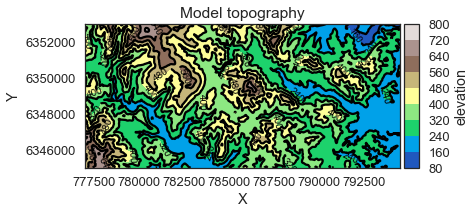

In [9]:
geo_model.set_topography(source='npy',filepath=os.pardir+"/data/input_data/AlesModel/AlesTopo.npy")

In [ ]:
gp.compute_model(geo_model, compute_mesh=True)

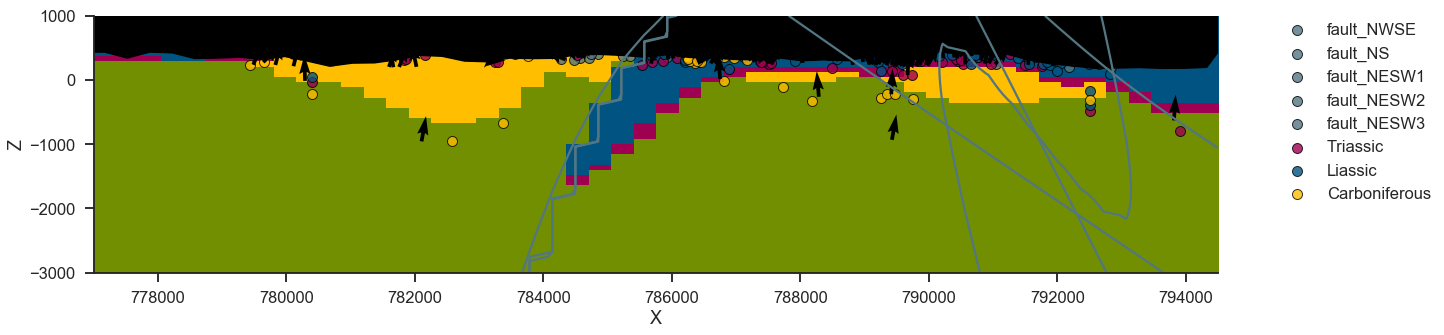

In [28]:
gp.plot.plot_section(geo_model, cell_number=18, block=geo_model.solutions.lith_block,
                         direction='y',show_faults=True,show_topo=True,show_data=True)